In [2]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
import pandas as pd
import numpy as np

# Question 1 Exploratory Data Analysis

__From example/input/ load compustat.csv inside compustat.zip  without unzip compustat.zip__

In [3]:
# Upload the dataset without unzipping the file
import zipfile
zip_file = zipfile.ZipFile('compustat.zip', 'r')
df = pd.read_csv(zip_file.open('compustat.csv'))

In [4]:
df.head(5)
print(df.columns)

Index(['gvkey', 'datadate', 'fyearq', 'fqtr', 'indfmt', 'consol', 'popsrc',
       'datafmt', 'cusip', 'curcdq', 'datacqtr', 'datafqtr', 'cshoq', 'saleq',
       'costat', 'prccq', 'sic'],
      dtype='object')


### 1. Variable names that we are interested in:

* sic code: four digits integer for company
* datecqtr: year/ quarter time for the record
* cusip: compustats identifier for a company
* chod: shares out of standing (in million)
* saleq: sales of current quarter (in million)
* prccq: close price of current quarter (in dollar)

In [5]:
# Obtain the variables we are interested in (avoid chain operation)
data = df.loc[:, ["sic", "datacqtr", "cusip", "cshoq", "saleq", "prccq"]]
data.head(5)

,sic,datacqtr,cusip,cshoq,saleq,prccq
0,3089.0,1966Q1,000032102,0.219,NaN,NaN
1,3089.0,1966Q2,000032102,0.219,NaN,NaN
2,3089.0,1966Q3,000032102,0.219,NaN,NaN
3,3089.0,1966Q4,000032102,0.219,4.032,NaN
4,3089.0,1967Q1,000032102,0.277,NaN,NaN


### 2. For saleq and market cap, compute the following:

* Time series mean 
* Time Series standard deviation
* Time Series count of missing values
* Time Series ratio of missing values
* Aggregate the result in a dataframe

__Notice__: In this problem, we'd better calculate each parameter for each individual company, that is, for each "sic".

In [6]:
# Calculate market cap: the # of outstanding shares * current market value of one share
data["mrkcap"] = data["cshoq"] * data["prccq"]
data.columns

Index(['sic', 'datacqtr', 'cusip', 'cshoq', 'saleq', 'prccq', 'mrkcap'], dtype='object')

In [7]:
data.head()

,sic,datacqtr,cusip,cshoq,saleq,prccq,mrkcap
0,3089.0,1966Q1,000032102,0.219,NaN,NaN,NaN
1,3089.0,1966Q2,000032102,0.219,NaN,NaN,NaN
2,3089.0,1966Q3,000032102,0.219,NaN,NaN,NaN
3,3089.0,1966Q4,000032102,0.219,4.032,NaN,NaN
4,3089.0,1967Q1,000032102,0.277,NaN,NaN,NaN


In [8]:
# Goal: compute the required parameters for the "saleq" with respect to different companies
sales = data.pivot_table(values = ["saleq"], index = ["datacqtr"], columns =["sic"])
# Create a dataframe for the parameters (for each company)
saleq_para = pd.concat([sales.mean(), sales.std(), len(sales) - sales.count(), (len(sales) - sales.count())/(len(sales))], axis = 1)
saleq_para.columns = ["mean", "std", "# of missing values", "missing value ratio"]

In [9]:
# Parameter summary for saleq
saleq_para

mean          std  # of missing values  \
      sic                                                     
saleq 100.0    210.761569   153.793232                   13   
      200.0     45.730984    57.098003                   80   
      700.0     69.080662    89.566404                   21   
      800.0     19.299191    20.465293                   53   
      900.0     11.289268     5.561760                  141   
...                   ...          ...                  ...   
      8744.0    81.643552   155.763764                   22   
      8900.0     1.911976     3.136163                  196   
      9995.0    31.266904    21.972147                    4   
      9997.0  6280.032904  5728.214729                    4   
      9998.0     0.435275     1.205664                  187   

              missing value ratio  
      sic                          
saleq 100.0              0.054622  
      200.0              0.336134  
      700.0              0.088235  
      800.0              0.222689  
      900.0              0.592437  
...                           ...  
      8744.0             0.092437  
      8900.0             0.823529  
      9995.0             0.016807  
      9997.0             0.016807  
      9998.0             0.785714  

[449 rows x 4 columns]

In [10]:
# Goal: compute the required parameters for the "mrkcap" with respect to different companies
market_cap = data.pivot_table(values = ["mrkcap"], index = ["datacqtr"], columns =["sic"])
# Create a dataframe for the parameters (for each company)
mrkcap_para = pd.concat([market_cap.mean(), market_cap.std(), len(market_cap) - market_cap.count(), (len(market_cap) - market_cap.count())/(len(market_cap))], axis = 1)
mrkcap_para.columns = ["mean", "std", "# of missing values", "missing value ratio"]

In [11]:
# Parameter summary for "mrkcap"
mrkcap_para

mean           std  # of missing values  \
       sic                                                       
mrkcap 100.0    1026.641305   1318.409211                   23   
       200.0     196.623839    293.130388                   82   
       700.0     437.762736    606.465125                   49   
       800.0     211.645994    246.173201                   64   
       900.0      20.414270      7.095283                  173   
...                     ...           ...                  ...   
       8744.0    133.026236    183.216280                   39   
       8900.0     35.620137     31.784375                  205   
       9995.0    185.027985    334.869757                   22   
       9997.0  38777.014892  34358.663587                   25   
       9998.0     14.391581      6.956347                  182   

               missing value ratio  
       sic                          
mrkcap 100.0              0.098291  
       200.0              0.350427  
       700.0              0.209402  
       800.0              0.273504  
       900.0              0.739316  
...                            ...  
       8744.0             0.166667  
       8900.0             0.876068  
       9995.0             0.094017  
       9997.0             0.106838  
       9998.0             0.777778  

[449 rows x 4 columns]

### 3. Answer the following questions:

__(a) Before computing any value, what kinds of descriptive analysis would you do to check if there are outliers?__

__Ans__: 

There are many ways to check if there are outliers, including utilizing the boxplot, histogram, or Z-score (when the data follows a normal distribution). 

However, for me, I would use the "1.5 * IQR" rule to check the outliers. That is to say, according to this rule, low outliers are below (Q1-1.5*IQR) and high outliers are above (Q3+1.5*1QR), where Q1 and Q3 are the first quartile and third quartile respectively, and IQR = (Q3-Q1)

__(b) Implement some schemes to detect outliers.__

__Ans__: Here, I would utilize the 1.5*IQR rule to detect the outliers.
* __For "saleq":__

In [12]:
sales.head()

saleq                                                          \
sic      100.0  200.0  700.0  800.0  900.0  1000.0 1040.0 1044.0 1090.0   
datacqtr                                                                  
1961Q1      NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
1961Q2      NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
1961Q3      NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
1961Q4      NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
1962Q1      NaN    NaN    NaN    NaN    NaN  72.95    NaN    NaN    NaN   

                 ...                                                          \
sic      1220.0  ... 8721.0 8731.0 8734.0 8741.0 8742.0 8744.0 8900.0 9995.0   
datacqtr         ...                                                           
1961Q1      NaN  ...    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
1961Q2      NaN  ...    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
1961Q3      NaN  ...    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
1961Q4      NaN  ...    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
1962Q1     18.1  ...    NaN    NaN    NaN    NaN    NaN    NaN    NaN    5.4   

                        
sic      9997.0 9998.0  
datacqtr                
1961Q1      NaN    NaN  
1961Q2      NaN    NaN  
1961Q3      NaN    NaN  
1961Q4      NaN    NaN  
1962Q1    652.7    NaN  

[5 rows x 449 columns]

In [13]:
# Obtain the description of the data
sales.describe()

saleq                                                             \
sic         100.0       200.0       700.0       800.0      900.0       1000.0   
count   225.000000  158.000000  217.000000  185.000000  97.000000  234.000000   
mean    210.761569   45.730984   69.080662   19.299191  11.289268  138.864482   
std     153.793232   57.098003   89.566404   20.465293   5.561760  124.434684   
min      57.326556    0.022500    1.014000    0.405500   2.062000   19.341000   
25%     108.528182    6.520937    3.796000    7.302250   8.095000   50.771344   
50%     153.344833   18.701125   20.356500   13.987500  10.504000   77.116667   
75%     272.099263   69.828625  101.626833   22.062000  12.447000  207.209872   
max    1047.078077  453.333000  346.393167  108.769000  32.441000  607.912637   

                                                       ...               \
sic        1040.0      1044.0      1090.0      1220.0  ...       8721.0   
count  219.000000  216.000000  204.000000  233.000000  ...   214.000000   
mean    29.934386    6.240967   15.516840  150.659496  ...   278.140754   
std     16.634485    4.638450    9.831098  114.447711  ...   205.773564   
min      4.154667    0.000000    0.000000   18.100000  ...    13.500000   
25%     15.416500    2.090438    9.210443   60.874167  ...   129.524250   
50%     29.183667    6.097571   16.761961  103.861500  ...   247.110800   
75%     39.989212    9.159083   22.752317  212.837455  ...   349.578500   
max     88.055560   21.491364   39.527556  538.562810  ...  1130.900000   

                                                                      \
sic         8731.0      8734.0      8741.0       8742.0       8744.0   
count   164.000000  217.000000  198.000000   218.000000   216.000000   
mean    100.856041   31.772518  104.915638   174.285085    81.643552   
std     167.704723   38.387461  100.996158   421.850898   155.763764   
min       1.862111    1.235000    3.287000     1.107000     6.513000   
25%       4.349375    5.890000   25.610500    12.140148    17.476312   
50%      27.191923   17.440800   70.665100    20.265346    37.547833   
75%     102.628909   46.162000  150.315146   244.820408    58.435125   
max    1047.131667  172.205500  402.122375  5522.271000  1828.000000   

                                                       
sic       8900.0      9995.0        9997.0     9998.0  
count  42.000000  234.000000    234.000000  51.000000  
mean    1.911976   31.266904   6280.032904   0.435275  
std     3.136163   21.972147   5728.214729   1.205664  
min     0.000000    0.000000    652.700000   0.000000  
25%     0.082750   12.411153   1582.968083   0.000000  
50%     0.330000   27.861530   3220.928013   0.000000  
75%     2.477750   48.536565  10303.465775   0.000000  
max    10.644000  112.515552  19505.391000   4.964000  

[8 rows x 449 columns]

In [14]:
# Compute the q1, q3 as well the IQR
sales_q = sales.describe().loc[["25%", "75%"], :]
sales_IQR = sales_q.loc["75%", :] - sales_q.loc["25%", :]
# Calculate the outliers according to the 1.5*IQR rule
sales_res = sales[(sales > sales_q.loc["75%", :] + 1.5 * sales_IQR) | (sales < sales_q.loc["25%", :] - 1.5 * sales_IQR)].count()
sales_res

       sic   
saleq  100.0      8
       200.0      4
       700.0     15
       800.0     11
       900.0      6
                 ..
       8744.0    32
       8900.0     6
       9995.0     1
       9997.0     0
       9998.0    11
Length: 449, dtype: int64

In [15]:
sales_res.describe()

count    449.000000
mean      10.075724
std       10.999739
min        0.000000
25%        1.000000
50%        7.000000
75%       17.000000
max       58.000000
dtype: float64

For "saleq" (sales of current quarter), among the 449 companies, there are companies with no outliers while there are still companies with 58 outliers.

* __For "mrkcap":__

In [16]:
market_cap.head()

mrkcap                                                          \
sic      100.0  200.0  700.0  800.0  900.0  1000.0 1040.0 1044.0 1090.0   
datacqtr                                                                  
1962Q1      NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
1962Q2      NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
1962Q3      NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
1962Q4      NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
1963Q1      NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   

                 ...                                                          \
sic      1220.0  ... 8721.0 8731.0 8734.0 8741.0 8742.0 8744.0 8900.0 9995.0   
datacqtr         ...                                                           
1962Q1      NaN  ...    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
1962Q2      NaN  ...    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
1962Q3      NaN  ...    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
1962Q4      NaN  ...    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
1963Q1      NaN  ...    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   

                        
sic      9997.0 9998.0  
datacqtr                
1962Q1      NaN    NaN  
1962Q2      NaN    NaN  
1962Q3      NaN    NaN  
1962Q4      NaN    NaN  
1963Q1      NaN    NaN  

[5 rows x 449 columns]

In [17]:
# Compute the q1, q3 as well the IQR
mrkcap_q = market_cap.describe().loc[["25%", "75%"], :]
mrkcap_IQR = mrkcap_q.loc["75%", :] - mrkcap_q.loc["25%", :]
# Calculate the outliers according to the 1.5*IQR rule
mrkcap_res = market_cap[(market_cap > mrkcap_q.loc["75%", :] + 1.5 * mrkcap_IQR) | (market_cap < mrkcap_q.loc["25%", :] - 1.5 * mrkcap_IQR)].count()
mrkcap_res

        sic   
mrkcap  100.0     12
        200.0     15
        700.0      7
        800.0      5
        900.0      0
                  ..
        8744.0    22
        8900.0     0
        9995.0    14
        9997.0     0
        9998.0     1
Length: 449, dtype: int64

In [18]:
# Summary of the result 
mrkcap_res.describe()

count    449.000000
mean      12.209354
std       10.783619
min        0.000000
25%        2.000000
50%       10.000000
75%       20.000000
max       41.000000
dtype: float64

Notice that, for "mrkcap" (market capital), among all the 449 companies, some companies have no outliers, but some have over 40 outliers.

__(c) Do you find some outliers? Could you think why? You can do some research using google.__

__Ans:__

* I have found some outliers for most of the companies with respect to "saleq" as well as "mrkcap". Usually, outliers occur becasue of the experimental error or variability in the measurement. Here, we assume that there is no experimental error.
* To find out the reason why there are many outliers, I have plotted the graph of "saleq" and "market capital" from companies with different numbers of outliers. What follows are the plots for "saleq" and "market capital". From both of the plots, we notice that, with larger number of outliers, the time series has large "jump" in the middle, which is shown in the "spike" in 2011Q1 of the orange line in "saleq" plot, and has experience large quantities of flunctuations, which is shown in the long period of flunctuations of the blue line in "market capital" plot.
* Therefore, a tentative conclusion can be made that "outliers" could be generated by "expected changes in the market" (large "jump") or "unstable status of the market" (long period of flunctuations).




In [19]:
import matplotlib.pyplot as plt

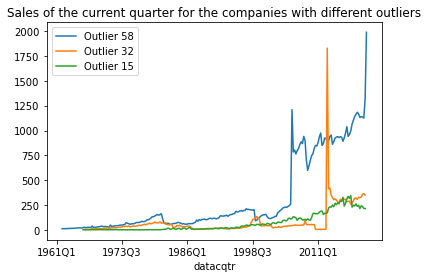

In [20]:
# Find the one with most outliers in saleq
sales_max_sic = sales_res[sales_res == sales_res.max()].index.values[0][1]
res = sales["saleq"][sales_max_sic].plot(label = "Outlier 58")
res.plot(sales["saleq"][8744], label = "Outlier 32")
res.plot(sales["saleq"][700], label = "Outlier 15")
res.set_title("Sales of the current quarter for the companies with different outliers")
res.legend()

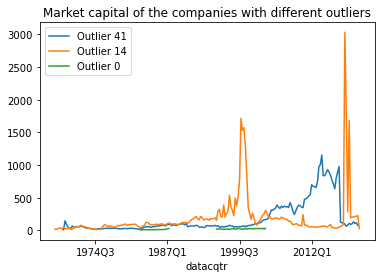

In [21]:
# Find the one with the most outliers in mrkcap
mrkcap_max_sic = mrkcap_res[mrkcap_res == mrkcap_res.max()].index.values[0][1]
mrkcap_max_sic
res2 = market_cap["mrkcap"][mrkcap_max_sic].plot(label = "Outlier 41")
res2.plot(market_cap["mrkcap"][9995], label = "Outlier 14")
res2.plot(market_cap["mrkcap"][900], label = "Outlier 0")
res2.set_title("Market capital of the companies with different outliers")
res2.legend()

__(d) What kinds of conclusion you can get from analyzing the table you get in 2? You can make some plots to illustrate.__

__Ans:__
The plots are given as follows:

In [22]:
saleq_para

mean          std  # of missing values  \
      sic                                                     
saleq 100.0    210.761569   153.793232                   13   
      200.0     45.730984    57.098003                   80   
      700.0     69.080662    89.566404                   21   
      800.0     19.299191    20.465293                   53   
      900.0     11.289268     5.561760                  141   
...                   ...          ...                  ...   
      8744.0    81.643552   155.763764                   22   
      8900.0     1.911976     3.136163                  196   
      9995.0    31.266904    21.972147                    4   
      9997.0  6280.032904  5728.214729                    4   
      9998.0     0.435275     1.205664                  187   

              missing value ratio  
      sic                          
saleq 100.0              0.054622  
      200.0              0.336134  
      700.0              0.088235  
      800.0              0.222689  
      900.0              0.592437  
...                           ...  
      8744.0             0.092437  
      8900.0             0.823529  
      9995.0             0.016807  
      9997.0             0.016807  
      9998.0             0.785714  

[449 rows x 4 columns]

In [23]:
mrkcap_para

mean           std  # of missing values  \
       sic                                                       
mrkcap 100.0    1026.641305   1318.409211                   23   
       200.0     196.623839    293.130388                   82   
       700.0     437.762736    606.465125                   49   
       800.0     211.645994    246.173201                   64   
       900.0      20.414270      7.095283                  173   
...                     ...           ...                  ...   
       8744.0    133.026236    183.216280                   39   
       8900.0     35.620137     31.784375                  205   
       9995.0    185.027985    334.869757                   22   
       9997.0  38777.014892  34358.663587                   25   
       9998.0     14.391581      6.956347                  182   

               missing value ratio  
       sic                          
mrkcap 100.0              0.098291  
       200.0              0.350427  
       700.0              0.209402  
       800.0              0.273504  
       900.0              0.739316  
...                            ...  
       8744.0             0.166667  
       8900.0             0.876068  
       9995.0             0.094017  
       9997.0             0.106838  
       9998.0             0.777778  

[449 rows x 4 columns]

Text(0.5, 1.0, 'missing value ratio')

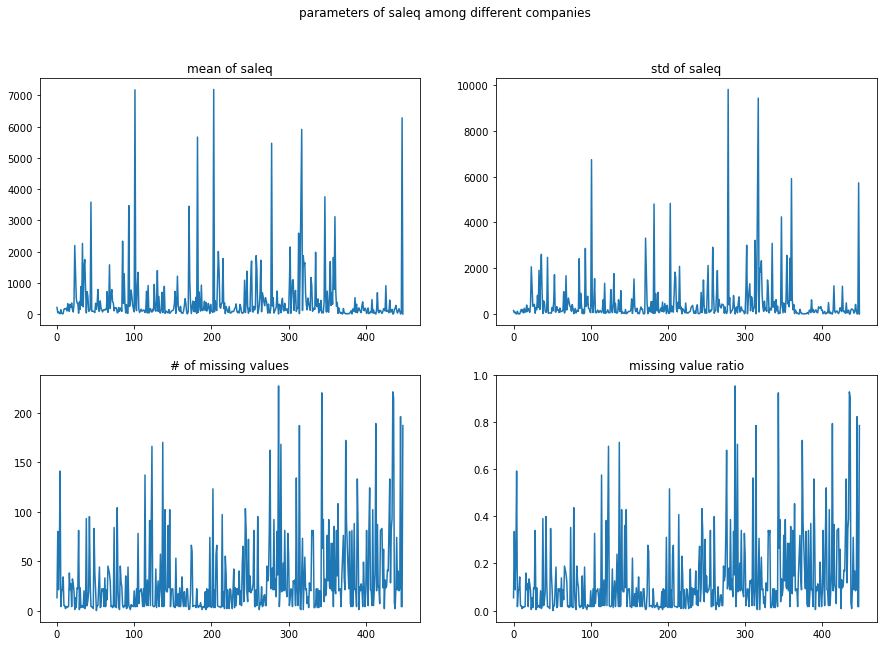

In [24]:
# Plot the Sales
fig, axs = plt.subplots(nrows = 2, ncols = 2, figsize = (15, 10))
fig.suptitle("parameters of saleq among different companies")
axs[0, 0].plot(saleq_para['mean'].values)
axs[0, 0].set_title("mean of saleq")
axs[0, 1].plot(saleq_para['std'].values)
axs[0, 1].set_title("std of saleq")
axs[1, 0].plot(saleq_para['# of missing values'].values)
axs[1, 0].set_title("# of missing values")
axs[1, 1].plot(saleq_para['missing value ratio'].values)
axs[1, 1].set_title("missing value ratio")

Text(0.5, 1.0, 'missing value ratio')

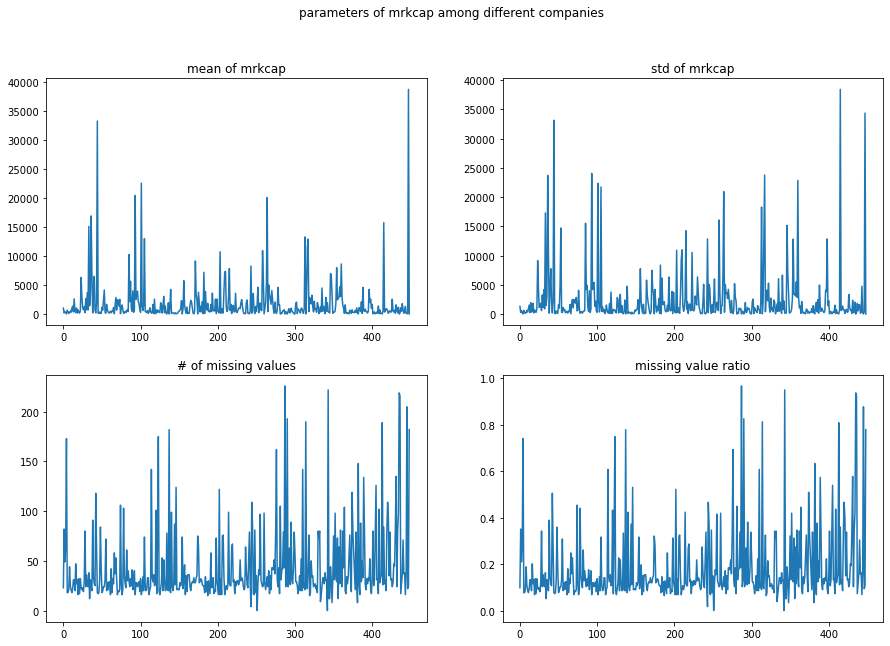

In [25]:
# Plot the Market Capital
fig2, axs2 = plt.subplots(nrows = 2, ncols = 2, figsize = (15, 10))
fig2.suptitle("parameters of mrkcap among different companies")
axs2[0, 0].plot(mrkcap_para['mean'].values)
axs2[0, 0].set_title("mean of mrkcap")
axs2[0, 1].plot(mrkcap_para['std'].values)
axs2[0, 1].set_title("std of mrkcap")
axs2[1, 0].plot(mrkcap_para['# of missing values'].values)
axs2[1, 0].set_title("# of missing values")
axs2[1, 1].plot(mrkcap_para['missing value ratio'].values)
axs2[1, 1].set_title("missing value ratio")

From the plots above, we can make the following conclusions:
* "Saleq" and "Mrkcap" have very different performances regarding different companies, which can be seens from the "flunctuations" and "jumps" from the "mean of mrkcap" and "mean of saleq".
* The "std" of "saleq" and "mrkcap" tends to be very high for a company when the mean of "saleq" and "mrkcap" is high. In other words, even though a company has a high level of "saleq" or "mrkcap", it is still very unstable.
* The number of missing values is huge for some companies.

# Question 2 Compute Industry Concentration

The defination of HHI index could be found: 

https://www.investopedia.com/terms/h/hhi.asp#:~:text=The%20Herfindahl%2DHirschman%20Index%20(HHI)%20is%20a%20commonly%20accepted,close%20to%20zero%20to%2010%2C000.

This index is used to measure the industry concentration and was used by congressman to determine whether to approve a merge deal or not.

Using the same data in question 1. Compute a panel data for HHI index for all industry, using a 2 digit SIC code.

Choose top 4 industry with the highest average HHI index, plot their time series pattern of HHI in a 2 by 2 figure.

HHI = squaring the market share percentage of each company (expressed as a whole number, not a decimal)

__Step:__
* Compute the HHI index for all industries
    * for each industry, compute the total market capital among all companies in one quarter.
    * for each industry, compute the market share for each company.
    * for each industry, compute the HHI index
* Choose top 4 industries with the highest average HHI index
* Plot the top 4 HHI index time series

In [26]:
data_cpy = data.copy()

In [28]:
# Compute the 2 digit of sic code (companies with the same code are in the same industry)
data_cpy['sic_2d'] = data_cpy['sic'] // 100
# Select the columns we need
new_data = data_cpy.loc[:, ["sic", "sic_2d", "datacqtr", "mrkcap", "cusip"]].dropna()
new_data.head()

(1811299, 8)


,sic,sic_2d,datacqtr,mrkcap,cusip
18,3089.0,30.0,1970Q3,26.202500,000032102
19,3089.0,30.0,1970Q4,24.460000,000032102
20,3089.0,30.0,1971Q1,34.193250,000032102
21,3089.0,30.0,1971Q2,29.023500,000032102
22,3089.0,30.0,1971Q3,16.256875,000032102


In [29]:
# For each industry, compute the total market capital for each quarter
# If the sic_2d and datacqtr are the same, mrkcap will be added up together
industry_mrkcap_sum = new_data["mrkcap"].groupby([new_data['sic_2d'], new_data['datacqtr']]).sum()
industry_sum_pd = pd.DataFrame(industry_mrkcap_sum).reset_index().rename(columns = {'mrkcap' : 'mrkcap_sum'})
industry_sum_pd

,sic_2d,datacqtr,mrkcap_sum
0,1.0,1967Q4,6.520500e+01
1,1.0,1968Q1,6.261750e+01
2,1.0,1968Q2,1.092959e+02
3,1.0,1968Q3,1.197269e+02
4,1.0,1968Q4,2.116655e+02
...,...,...,...
14733,99.0,2019Q2,9.613840e+05
14734,99.0,2019Q3,8.613855e+05
14735,99.0,2019Q4,1.008095e+06
14736,99.0,2020Q1,7.462033e+05


In [30]:
# For each industry, compute the market share for each company
mrkcap_share = pd.merge(new_data, industry_sum_pd)
mrkcap_share['market_share'] = ((mrkcap_share['mrkcap'] / mrkcap_share['mrkcap_sum']) * 100) ** 2
mrkcap_share

,sic,sic_2d,datacqtr,mrkcap,cusip,mrkcap_sum,market_share
0,3089.0,30.0,1970Q3,26.20250,000032102,6289.293375,0.173573
1,3089.0,30.0,1970Q3,37.07050,002024107,6289.293375,0.347419
2,3060.0,30.0,1970Q3,30.90450,005086103,6289.293375,0.241457
3,3060.0,30.0,1970Q3,20.08825,008230104,6289.293375,0.102019
4,3011.0,30.0,1970Q3,8.57475,018789107,6289.293375,0.018588
...,...,...,...,...,...,...,...
1341556,900.0,9.0,2004Q4,10.45058,049408206,10.450580,10000.000000
1341557,900.0,9.0,2005Q2,14.13902,049408206,14.139020,10000.000000
1341558,900.0,9.0,2005Q4,17.78355,049408206,17.783550,10000.000000
1341559,900.0,9.0,2006Q2,21.52225,049408206,21.522250,10000.000000


In [32]:
# Compute the HHI for each industry for givan quarter
HHI_temp = mrkcap_share['market_share'].groupby([mrkcap_share['sic_2d'], mrkcap_share['datacqtr']]).sum()
HHI_table = pd.DataFrame(HHI_temp).reset_index().rename(columns = {'market_share' : 'HHI_index'})
HHI_table

,sic_2d,datacqtr,HHI_index
0,1.0,1967Q4,10000.000000
1,1.0,1968Q1,10000.000000
2,1.0,1968Q2,5667.833632
3,1.0,1968Q3,5927.306594
4,1.0,1968Q4,3414.368239
...,...,...,...
14733,99.0,2019Q2,3344.466795
14734,99.0,2019Q3,3883.887617
14735,99.0,2019Q4,3385.718216
14736,99.0,2020Q1,3891.059010


In [72]:
# Compute the average of HHI for each industry and select the top four industries based on the average
HHI_average_temp = HHI_table['HHI_index'].groupby(HHI_table['sic_2d']).mean()
HHI_average = pd.DataFrame(HHI_average_temp).reset_index().rename(columns = {'HHI_index' : 'HHI_mean'})
HHI_sorted = HHI_average.sort_values(by = 'HHI_mean').reset_index()
HHI_sorted

,index,sic_2d,HHI_mean
0,51,60.0,285.713862
1,40,49.0,405.674940
2,20,28.0,694.649030
3,7,13.0,716.409475
4,28,36.0,775.764763
...,...,...,...
69,69,84.0,9200.079235
70,4,9.0,9237.889784
71,66,81.0,9362.460875
72,70,86.0,10000.000000


In [74]:
# Find the top 4 industries
top_4_HHI = HHI_sorted.loc[68: 71]
top_4_HHI

,index,sic_2d,HHI_mean
68,2,7.0,8247.612978
69,69,84.0,9200.079235
70,4,9.0,9237.889784
71,66,81.0,9362.460875


From the above dataframe, we can see that the top four industries is: 89.0, 86.0, 81.0, 9.0.

Now, we move on to plot the time series patterns of them in a 2 by 2 figure.

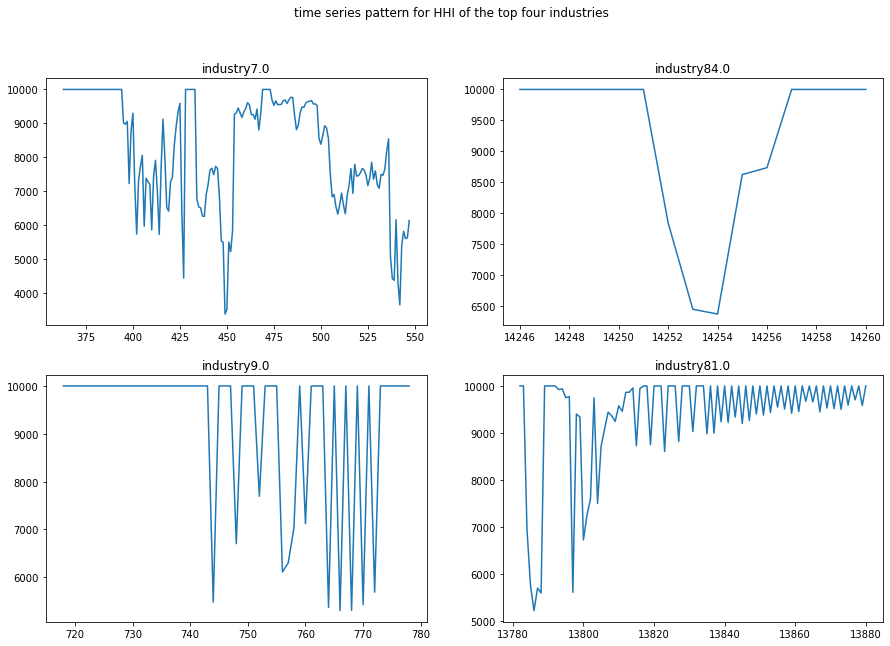

In [78]:
# Store the top four industries' code
top_4 = top_4_HHI['sic_2d'].values
# Plotting
fig_top, axs_top = plt.subplots(nrows = 2, ncols = 2, figsize = (15, 10))
fig_top.suptitle("time series pattern for HHI of the top four industries")
for i in range(len(top_4)):
    if i <= 1:
        axs_top[0, i].plot(HHI_table.loc[HHI_table['sic_2d'] == top_4[i]]['HHI_index'])
        axs_top[0, i].set_title("industry" + str(top_4[i]))
    else:
        axs_top[1, i - 2].plot(HHI_table.loc[HHI_table['sic_2d'] == top_4[i]]['HHI_index'])
        axs_top[1, i - 2].set_title("industry" + str(top_4[i]))